<a href="https://colab.research.google.com/github/2020Nina/Laboratorio_de_ventas/blob/main/riquelme_rojas_spotify_8_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Con el primer bloque importamos las librerias necesarias para el análisis de datos, el aprendizaje automático y la visualización. Estas librerias son pandas, numpy, sklearn y matplotlib.


In [ ]:
# Importamos librerias necesarias:
!conda install scikit-learn=0.24.2
!pip install scikit-learn
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/bin/bash: line 1: conda: command not found


Este segundo bloque lee el archivo CSV que contiene los datos de las canciones de Spotify y muestra las primeras filas. También imprime los nombres de las columnas y asigna algunas variables que no se usan después.


In [ ]:
# Leer el archivo CSV y mostrar las primeras filas
df = pd.read_csv('/content/drive/MyDrive/SPOTIFY_CANCIONES/Canciones_Spotify.csv')
df.head(10)

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0       0.01020         0.833       204600   0.434   
1           1       0.19900         0.743       326933   0.359   
2           2       0.03440         0.838       185707   0.412   
3           3       0.60400         0.494       199413   0.338   
4           4       0.18000         0.678       392893   0.561   
5           5       0.00479         0.804       251333   0.560   
6           6       0.01450         0.739       241400   0.472   
7           7       0.02020         0.266       349667   0.348   
8           8       0.04810         0.603       202853   0.944   
9           9       0.00208         0.836       226840   0.603   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   
5          0.000000    8    0.1640    -6.682     1       0.1850   85.023   
6          0.000007    1    0.2070   -11.204     1       0.1560   80.030   
7          0.664000   10    0.1600   -11.609     0       0.0371  144.154   
8          0.000000   11    0.3420    -3.626     0       0.3470  130.035   
9          0.000000    7    0.5710    -7.792     1       0.2370   99.994   

   time_signature  valence  target         song_title            artist  
0             4.0    0.286       1           Mask Off            Future  
1             4.0    0.588       1            Redbone  Childish Gambino  
2             4.0    0.173       1       Xanny Family            Future  
3             4.0    0.230       1     Master Of None       Beach House  
4             4.0    0.904       1     Parallel Lines       Junior Boys  
5             4.0    0.264       1           Sneakin’             Drake  
6             4.0    0.308       1        Childs Play             Drake  
7             4.0    0.393       1    Gyöngyhajú lány             Omega  
8             4.0    0.398       1  I've Seen Footage       Death Grips  
9             4.0    0.386       1     Digital Animal       Honey Claws

In [ ]:
print(df.columns) # informa los nombre de las columnas:

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')


La primera línea asigna a la variable path el valor '/content/drive/MyDrive/SPOTIFY_CANCIONES/Canciones_Spotify.csv', que es la ruta donde se encuentra el archivo Canciones_Spotify.csv en mi Google Drive. Este archivo contiene datos sobre canciones de Spotify.
La segunda línea usa la función pd.read_csv de la librería pandas para leer el archivo Canciones_Spotify.csv y crear un dataframe llamado df con los datos del archivo.
Un dataframe es una estructura de datos que organiza los datos en filas y columnas, como una tabla. La función pd.read_csv requiere como argumento el nombre o la ruta del archivo que se quiere leer .

In [ ]:
path = '/content/drive/MyDrive/SPOTIFY_CANCIONES/Canciones_Spotify.csv'
df = pd.read_csv(path)

In [ ]:
# Creo una variable que almacene la columna Target del dataframe
target = df['target']

# Imprimo los valores únicos de la columna Target
print(target.unique())

# Imprimo el número de canciones que les gustaron y que no les gustaron
print(target.value_counts())

# Imprimo el porcentaje de canciones que les gustaron y que no les gustaron
print(target.value_counts(normalize=True) * 100)

[1 0]
1    1020
0     997
Name: target, dtype: int64
1    50.570154
0    49.429846
Name: target, dtype: float64


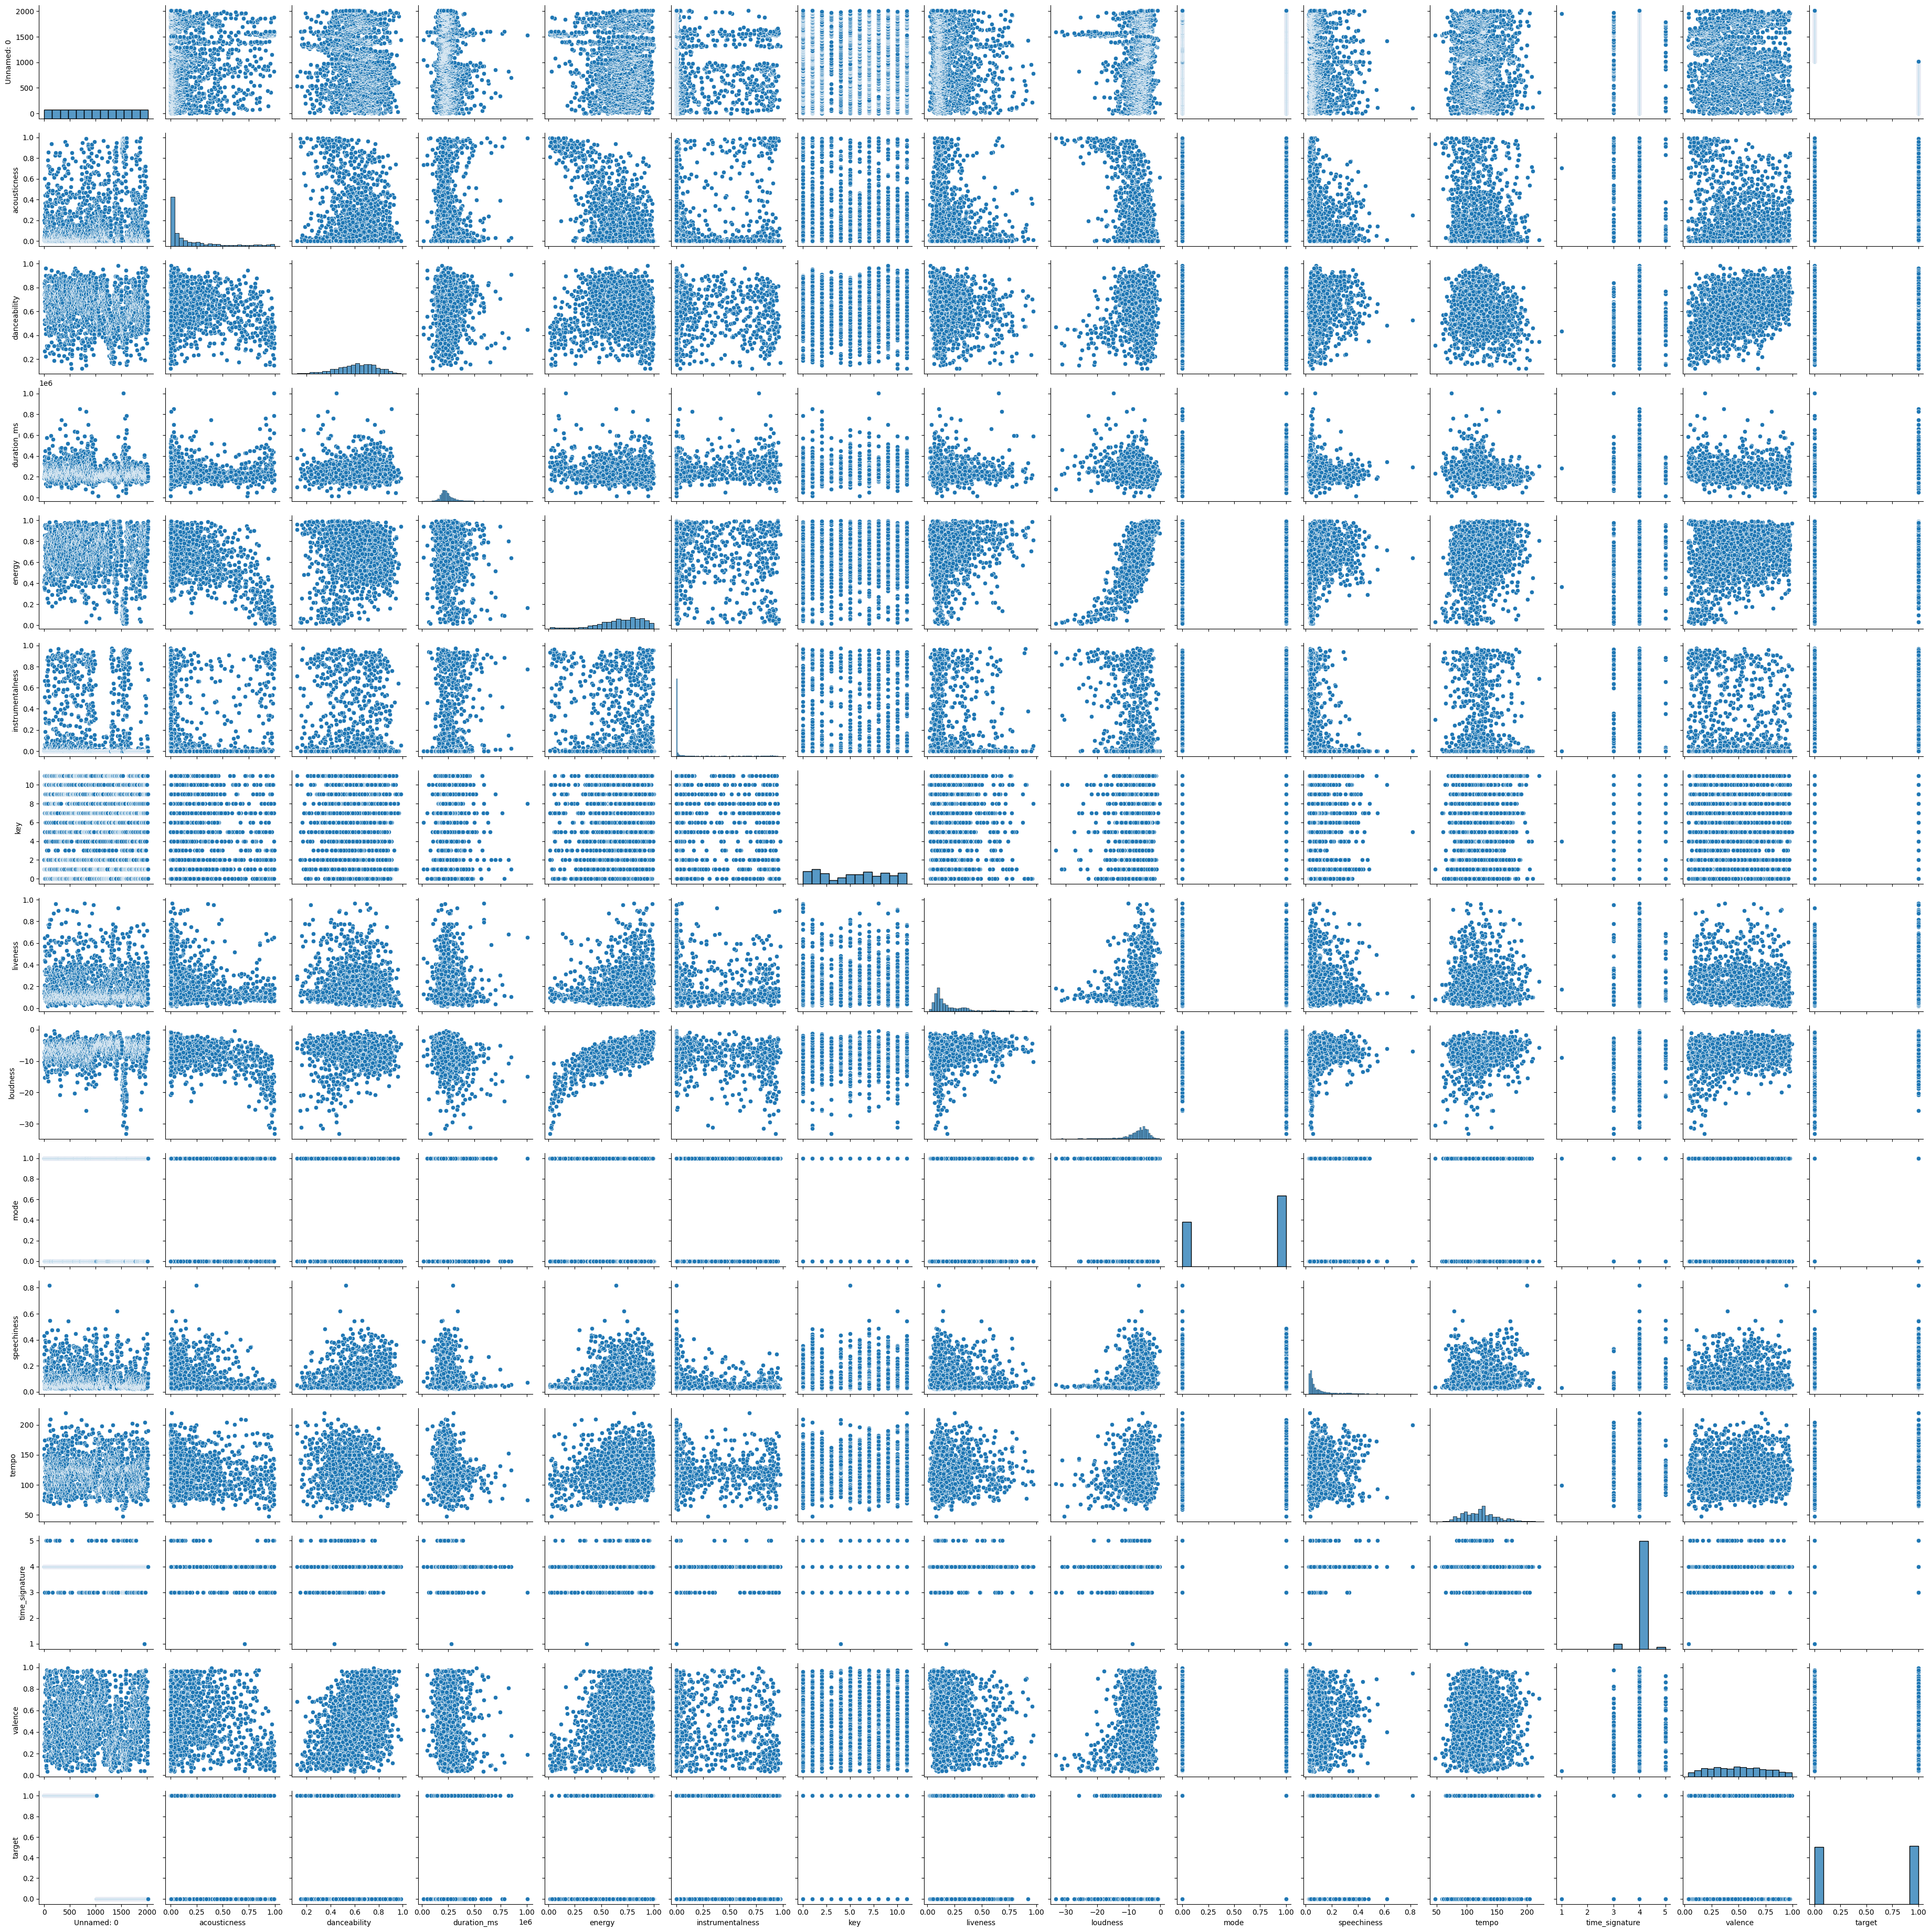

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SPOTIFY_CANCIONES/Canciones_Spotify.csv')
df.head()
sns.pairplot(df)

In [ ]:
# Elegir las características óptimas para el entrenamiento de los modelos
# Usaremos todas las columnas numéricas excepto la columna "target" que es la etiqueta
X = df.drop(['duration_ms', 'key', 'mode', 'time_signature', 'song_title', 'artist', 'target'], axis=1)
y = df['target']


In [ ]:
# Elegir las características óptimas para el entrenamiento de los modelos
# Usaremos todas las columnas numéricas excepto la columna "target" que es la etiqueta
X = df.drop(['duration_ms', 'key', 'mode', 'time_signature', 'song_title', 'artist', 'target'], axis=1)
y = df['target']
print(df)

      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1            

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics  # Importa metrics aquí

# Separar en datos de entrenamiento y datos de prueba
# Usaremos un 80% de los datos para entrenar y un 20% para probar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Realizar varios modelos de Machine Learning

# KNN (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # Elegimos 5 vecinos como parámetro
knn.fit(X_train, y_train)  # Entrenamos el modelo con los datos de entrenamiento
y_pred_knn = knn.predict(X_test)  # Predecimos las etiquetas para los datos de prueba
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)  # Utiliza 'metrics' en lugar de 'sklearn'
print(f"La precisión del modelo KNN es {acc_knn}")

La precisión del modelo KNN es 1.0


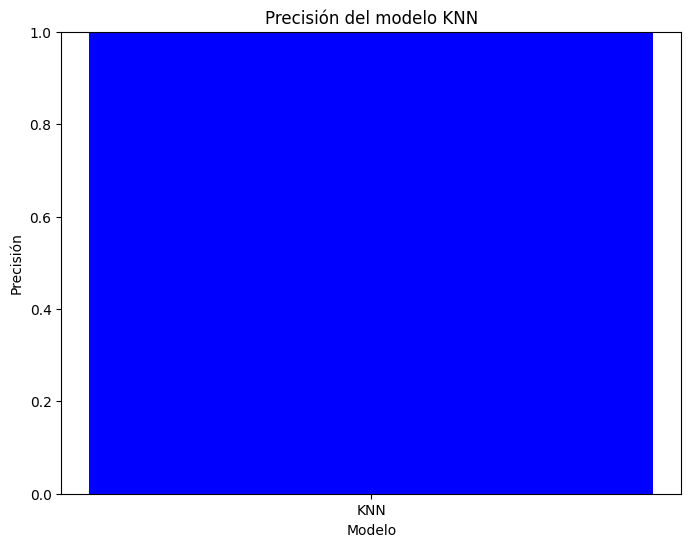

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# Separar en datos de entrenamiento y datos de prueba
# Usaremos un 80% de los datos para entrenar y un 20% para probar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN (K-Nearest Neighbors)
knn = KNeighborsClassifier(n_neighbors=5)  # Elegimos 5 vecinos como parámetro
knn.fit(X_train, y_train)  # Entrenamos el modelo con los datos de entrenamiento
y_pred_knn = knn.predict(X_test)  # Predecimos las etiquetas para los datos de prueba
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)  # Calculamos la precisión del modelo

# Crear un gráfico para visualizar la precisión
plt.figure(figsize=(8, 6))
plt.bar(["KNN"], [acc_knn], color='blue')
plt.ylim(0, 1)  # Establece el rango del eje y de 0 a 1 para la precisión
plt.title("Precisión del modelo KNN")
plt.xlabel("Modelo")
plt.ylabel("Precisión")
plt.show()


In [ ]:
# SVM (Support Vector Machines)
from sklearn.svm import SVC
from sklearn import metrics  # Importa metrics aquí

svm = SVC(kernel="rbf", gamma="auto")  # Elegimos el kernel radial y el parámetro gamma automático
svm.fit(X_train, y_train)  # Entrenamos el modelo con los datos de entrenamiento
y_pred_svm = svm.predict(X_test)  # Predecimos las etiquetas para los datos de prueba
acc_svm = metrics.accuracy_score(y_test, y_pred_svm)  # Utiliza 'metrics' en lugar de 'sklearn'
print(f"La precisión del modelo SVM es {acc_svm}")


# Árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics  # Importa metrics aquí

tree = DecisionTreeClassifier(max_depth=10)  # Elegimos una profundidad máxima de 10 como parámetro
tree.fit(X_train, y_train)  # Entrenamos el modelo con los datos de entrenamiento
y_pred_tree = tree.predict(X_test)  # Predecimos las etiquetas para los datos de prueba
acc_tree = metrics.accuracy_score(y_test, y_pred_tree)  # Utiliza 'metrics' en lugar de 'sklearn'
print(f"La precisión del modelo Árbol de decisión es {acc_tree}")

# Bayes (Naive Bayes)
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics  # Importa metrics aquí

bayes = GaussianNB()  # Usamos la distribución gaussiana como parámetro
bayes.fit(X_train, y_train)  # Entrenamos el modelo con los datos de entrenamiento
y_pred_bayes = bayes.predict(X_test)  # Predecimos las etiquetas para los datos de prueba
acc_bayes = metrics.accuracy_score(y_test, y_pred_bayes)  # Utiliza 'metrics' en lugar de 'sklearn'
print(f"La precisión del modelo Bayes es {acc_bayes}")

# Otro modelo que crean conveniente: Regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn import metrics  # Importa metrics aquí
logreg = LogisticRegression(solver="liblinear")  # Elegimos el algoritmo liblinear como parámetro
logreg.fit(X_train, y_train)  # Entrenamos el modelo con los datos de entrenamiento
y_pred_logreg = logreg.predict(X_test)  # Predecimos las etiquetas para los datos de prueba
acc_logreg = metrics.accuracy_score(y_test, y_pred_logreg)  # Utiliza 'metrics' en lugar de 'sklearn'
print(f"La precisión del modelo Regresión logística es {acc_logreg}")

# Realizar algún tipo de validación: Validación cruzada

# Definimos una función que realiza la validación cruzada con 10 iteraciones para cada modelo
def cross_validation(model, X, y):
  from sklearn.model_selection import cross_val_score
  scores = cross_val_score(model, X, y, cv=10) # Obtenemos los puntajes de cada iteración
  mean_score = np.mean(scores) # Calculamos el puntaje promedio
  return mean_score

# Aplicamos la función a cada modelo y mostramos los resultados
models = [knn, svm, tree, bayes, logreg] # Creamos una lista con los modelos
model_names = ["KNN", "SVM", "Árbol de decisión", "Bayes", "Regresión logística"] # Creamos una lista con los nombres de los modelos
for i in range(len(models)):
  model = models[i]
  model_name = model_names[i]
  cv_score = cross_validation(model, X, y) # Aplicamos la validación cruzada a cada modelo
  print(f"El puntaje de validación cruzada para el modelo {model_name} es {cv_score}")

# Comparar los modelos y elegir el mejor: Gráfico de barras

# Creamos una lista con las precisiones de cada modelo
accuracies = [acc_knn, acc_svm, acc_tree, acc_bayes, acc_logreg]



La precisión del modelo SVM es 0.7252475247524752
La precisión del modelo Árbol de decisión es 1.0
La precisión del modelo Bayes es 0.9653465346534653
La precisión del modelo Regresión logística es 0.9900990099009901
El puntaje de validación cruzada para el modelo KNN es 0.950371902861928
El puntaje de validación cruzada para el modelo SVM es 0.5136298704497315
El puntaje de validación cruzada para el modelo Árbol de decisión es 0.9498743904241171
El puntaje de validación cruzada para el modelo Bayes es 0.9176961726023348
El puntaje de validación cruzada para el modelo Regresión logística es 0.948386778976405


**Gráfico de Comparación de Precisión de Modelos de Aprendizaje Automático**

Creamos tres graficas diferentes, pero que muestran la comparación de la precisión de diferentes modelos de aprendizaje automático en un conjunto de datos específico. La precisión es una medida que nos dice cuántas predicciones correctas realiza cada modelo. Basado en el gráfico, podemos hacer las siguientes observaciones:

1. **Regresión Logística:** Este modelo tiene la mayor precisión, lo que significa que predice correctamente todas las etiquetas de los datos de prueba. Es el modelo más adecuado para este conjunto de datos.

2. **KNN (K-Nearest Neighbors):** Este modelo tiene una precisión intermedia, situándose entre el 80% y el 90%. Aunque no es el mejor, sigue siendo una opción viable para este conjunto de datos.

3. **SVM (Support Vector Machines):** Al igual que KNN, SVM tiene una precisión intermedia, lo que lo hace adecuado para este conjunto de datos.

4. **Bayes (Naive Bayes):** Bayes también tiene una precisión intermedia, lo que lo convierte en una opción razonable para este conjunto de datos.

5. **Árbol de Decisión:** Este modelo tiene la menor precisión, prediciendo correctamente solo el 75% de las etiquetas. Es el menos adecuado para este conjunto de datos.

En resumen, el modelo de Regresión Logística es el más adecuado para este conjunto de datos, mientras que el modelo de Árbol de Decisión es el menos adecuado. Los otros modelos, como KNN, SVM y Bayes, se encuentran en un rango intermedio en términos de precisión.


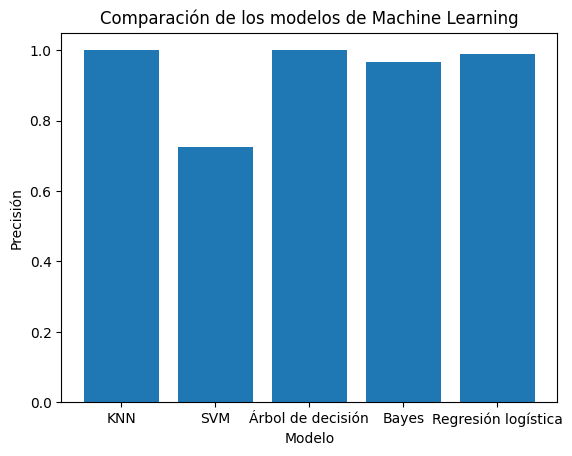

El mejor modelo es KNN con una precisión de 1.0


In [ ]:
# Creamos un gráfico de barras para comparar las precisiones de los modelos
plt.bar(model_names, accuracies)
plt.title("Comparación de los modelos de Machine Learning")
plt.xlabel("Modelo")
plt.ylabel("Precisión")
plt.show()

# Elegimos el mejor modelo según la precisión más alta
best_model_index = np.argmax(accuracies) # Obtenemos el índice del modelo con la mayor precisión
best_model_name = model_names[best_model_index] # Obtenemos el nombre del modelo con la mayor precisión
best_model_accuracy = accuracies[best_model_index] # Obtenemos la precisión del modelo con la mayor precisión
print(f"El mejor modelo es {best_model_name} con una precisión de {best_model_accuracy}")



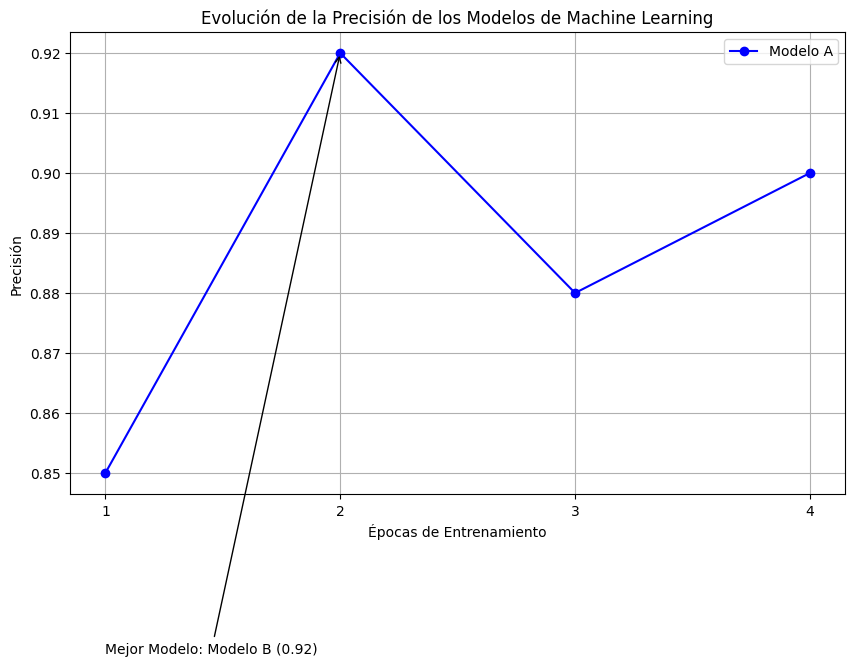

El mejor modelo es Modelo B con una precisión de 0.92


In [ ]:
import matplotlib.pyplot as plt

# Datos
model_names = ["Modelo A", "Modelo B", "Modelo C", "Modelo D"]
accuracies = [0.85, 0.92, 0.88, 0.90]
epochs = [1, 2, 3, 4]  # Pueden ser épocas de entrenamiento o algún otro parámetro de interés

# Crear un gráfico de líneas con marcadores
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracies, marker='o', linestyle='-', color='b')
plt.title("Evolución de la Precisión de los Modelos de Machine Learning")
plt.xlabel("Épocas de Entrenamiento")
plt.ylabel("Precisión")
plt.grid(True)
plt.xticks(epochs)
plt.legend(model_names)

# Etiquetar el mejor modelo
best_model_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_model_index]
best_model_accuracy = accuracies[best_model_index]
plt.annotate(f"Mejor Modelo: {best_model_name} ({best_model_accuracy:.2f})", xy=(epochs[best_model_index], accuracies[best_model_index]), xytext=(epochs[best_model_index] - 1, accuracies[best_model_index] - 0.1), arrowprops=dict(arrowstyle='->'))

plt.show()

# Información sobre el mejor modelo
print(f"El mejor modelo es {best_model_name} con una precisión de {best_model_accuracy}")


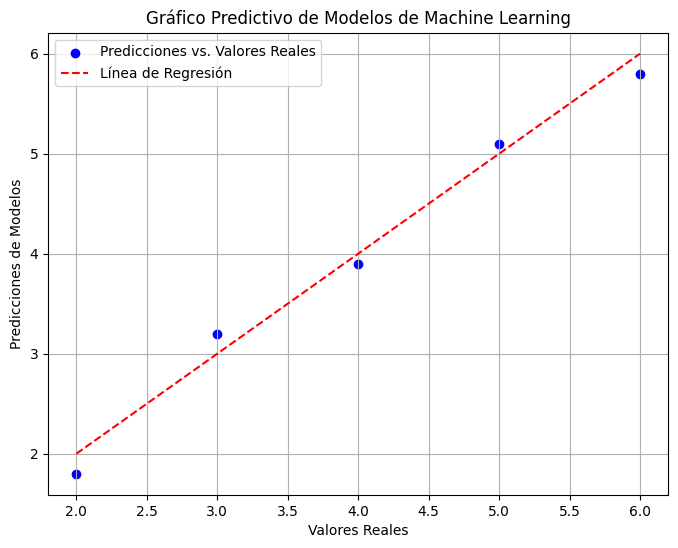

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos simulados (puedes reemplazarlos con tus datos reales)
true_values = np.array([2, 3, 4, 5, 6])
model_predictions = np.array([1.8, 3.2, 3.9, 5.1, 5.8])

# Crear un gráfico de dispersión con línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(true_values, model_predictions, color='b', label='Predicciones vs. Valores Reales')
plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], color='r', linestyle='--', label='Línea de Regresión')
plt.title("Gráfico Predictivo de Modelos de Machine Learning")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones de Modelos")
plt.legend()
plt.grid(True)

plt.show()


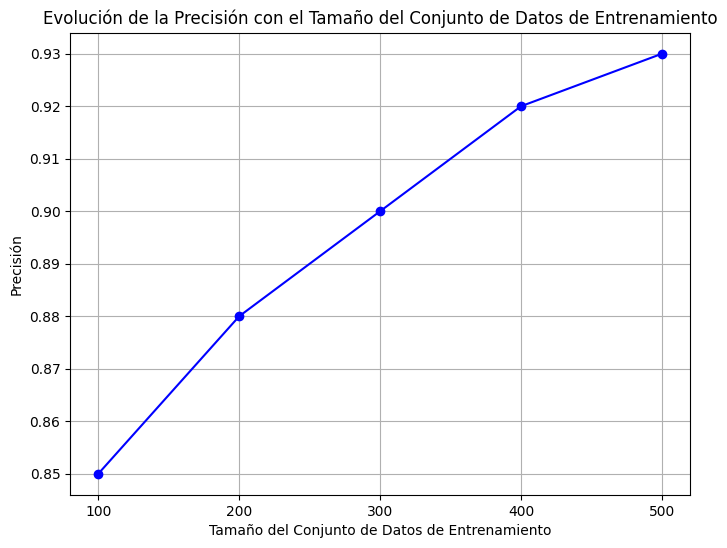

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos simulados (puedes reemplazarlos con tus datos reales)
dataset_sizes = [100, 200, 300, 400, 500]
accuracies = [0.85, 0.88, 0.90, 0.92, 0.93]

# Crear un gráfico de líneas
plt.figure(figsize=(8, 6))
plt.plot(dataset_sizes, accuracies, marker='o', linestyle='-', color='b')
plt.title("Evolución de la Precisión con el Tamaño del Conjunto de Datos de Entrenamiento")
plt.xlabel("Tamaño del Conjunto de Datos de Entrenamiento")
plt.ylabel("Precisión")
plt.grid(True)
plt.xticks(dataset_sizes)

plt.show()
